# Problem Statement

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)

In [2]:
lead=pd.read_csv("Leads.csv")###reading the data

In [3]:
lead

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


Inspecting the data

In [4]:
##Lets check the dimension of the data
lead.shape

(9240, 37)

In [5]:
###Lets check the info of the data
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Data Preparation

In [6]:
###checking the null values

(lead.isnull().sum()/len(lead))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
lead["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [8]:
##dropping the columns whose null values is greater than 30%
lead.drop(["Tags","Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"], axis=1, inplace=True)

In [9]:
lead.shape

(9240, 31)

In [10]:
###checking the null values again

(lead.isnull().sum()/len(lead))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# Replacing all 'select' values with NaN
lead = lead.replace('Select', np.nan)

In [12]:
lead["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [13]:
(lead.isna().sum()/len(lead))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [14]:
###dropping the columns whose null values is greater than or equal 30%
lead.drop(["Specialization", "How did you hear about X Education", "Lead Profile", "City"], axis=1, inplace=True)


In [15]:
##checking the null values again
(lead.isna().sum()/len(lead))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [16]:
### droping the irrevalant columns
lead.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)

In [17]:
##droping the duplicate data like Newspaper Article because have same newpaper columns
lead.drop(["Newspaper Article"], axis=1, inplace=True)

In [18]:
###checking the value counts of lead source
lead["Lead Source"].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [19]:
###replacing google with Google
lead["Lead Source"]= lead["Lead Source"].replace("google", "Google")

In [20]:
lead["Lead Source"].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [21]:
###Treating the null value with Google
lead["Lead Source"] = lead["Lead Source"].fillna("Google")

In [22]:
##checking the null values in Lead source
lead["Lead Source"].isnull().sum()

0

In [23]:
##checking the null values again
(lead.isna().sum()/len(lead))*100

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.0000

In [24]:
###for treating the last activity's null values we will check the value counts
lead["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [25]:
###treating the null value with"Email Opened"
lead["Last Activity"]=lead["Last Activity"].fillna("Email Opened")

In [26]:
##checkig the null values again
lead["Last Activity"].isnull().sum()

0

In [27]:
###checking the value counts of country
lead["Country"].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [28]:
###dropping the country because all 96% values is India so it can affect our data
lead.drop("Country",axis=1, inplace=True)


In [29]:
##checking the null values again
lead.isnull().sum()/len(lead)*100

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     0.000000
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.000000
Through Recommendations                           0.0000

In [30]:
lead["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
###treating the null value with"Unemployed"
lead["What is your current occupation"]=lead["What is your current occupation"].fillna("Unemployed")

In [32]:
lead["What is your current occupation"].isnull().sum()

0

In [33]:
lead["What matters most to you in choosing a course"].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [34]:
## after checking the value counts we can say that the "Better Career Prospects" is about the 99% so this can affect the data so we can drop this
lead.drop("What matters most to you in choosing a course", axis=1, inplace=True)

In [35]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
lead = lead.dropna()

In [36]:
##checking the null values of leads dataframe
lead.isnull().sum()/len(lead)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview  

# EDA

In [37]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Do Not Call                               9103 non-null   object 
 4   Converted                                 9103 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9103 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9103 non-null   object 
 9   What is your current occupation           9103 non-null   object 
 10  Search                              

In [38]:
##segragating the data continous and categorical columns
cats_cols=["Lead Origin", "Lead Source", "Do Not Email", "Do Not Call", "What is your current occupation", "Search", "Magazine", "Last Activity" ,"X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview", "Last Notable Activity"]
cont_cols= ["Total Time Spent on Website","TotalVisits", "Page Views Per Visit"]
target= ["Converted"]
len(cats_cols)+len(cont_cols)+len(target)

22

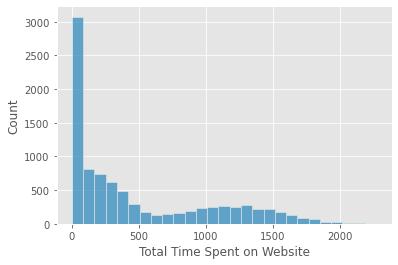

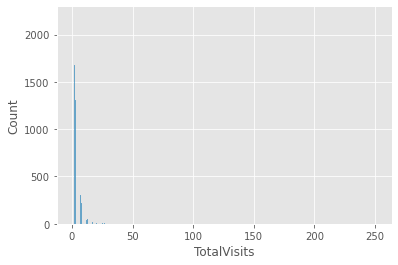

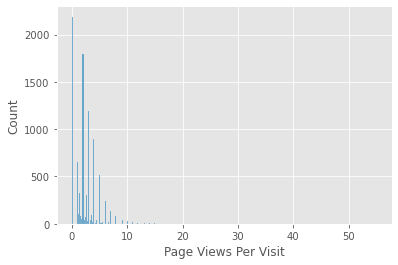

In [40]:
###univariate analysis for histogram
for i in cont_cols:
    sns.histplot(lead[i])
    plt.show()

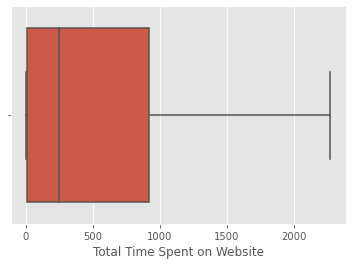

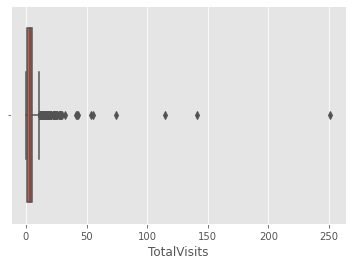

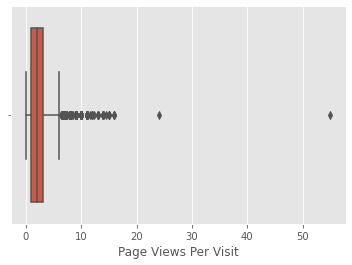

In [41]:
###univariate analysis
##for boxplot
for i in cont_cols:
    sns.boxplot(lead[i])
    plt.show()

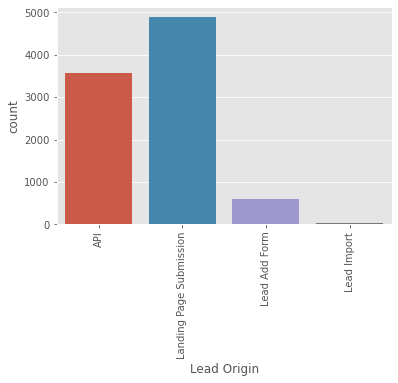

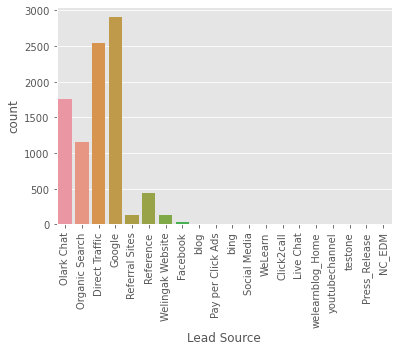

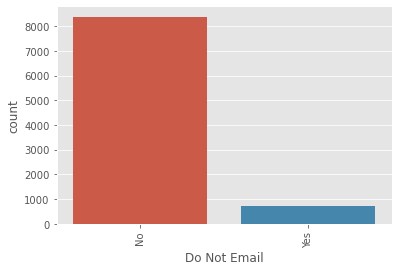

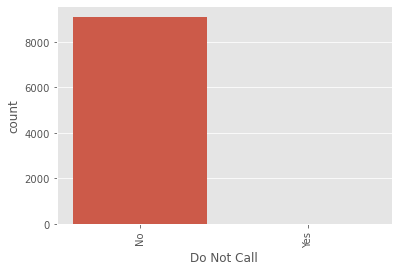

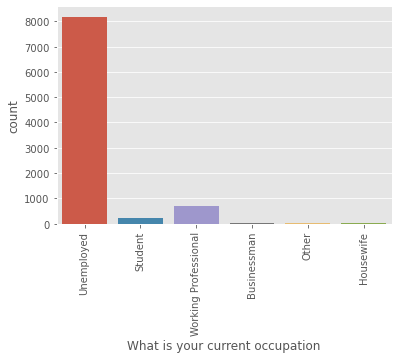

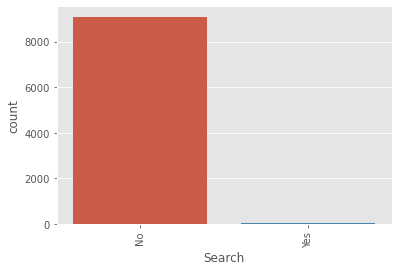

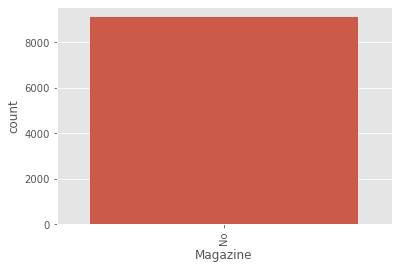

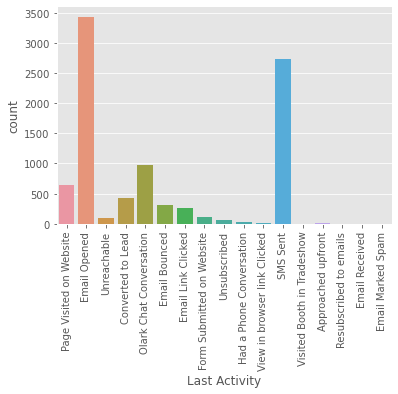

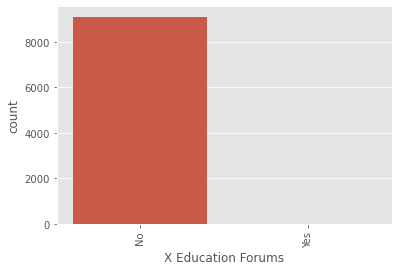

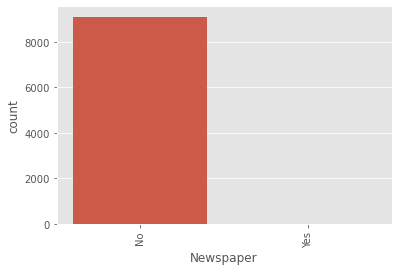

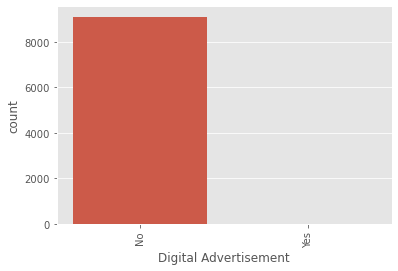

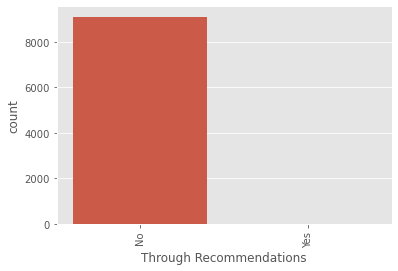

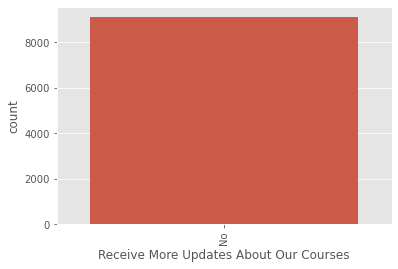

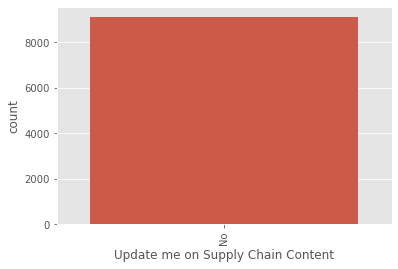

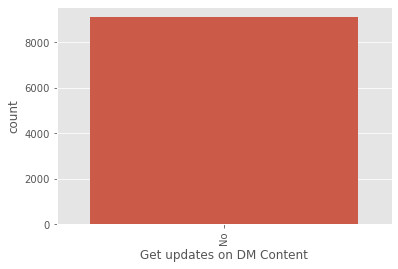

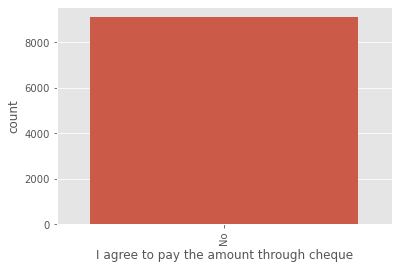

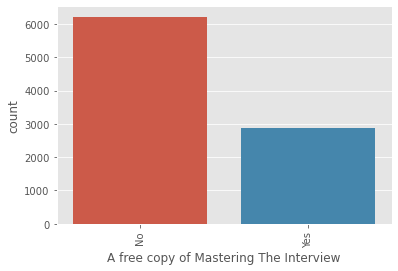

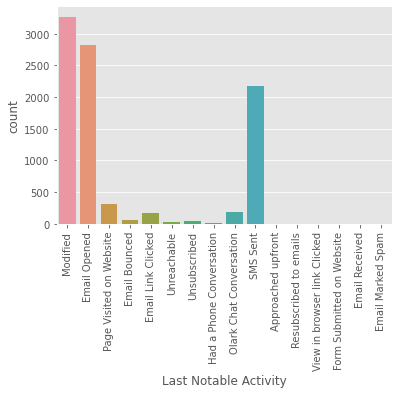

In [42]:
###for categorical column
##countplot
for i in cats_cols:
  sns.countplot(lead[i])
  plt.xticks(rotation=90)
  plt.show()

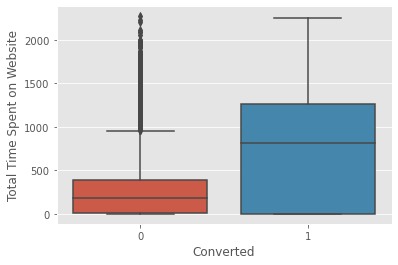

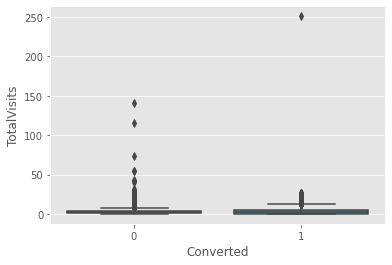

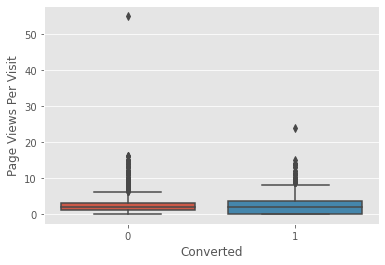

In [43]:
##bivariate analysis
##for continous and  categoriacal
for i in cont_cols:
    sns.boxplot(lead["Converted"],lead[i], data=lead)
    plt.show()

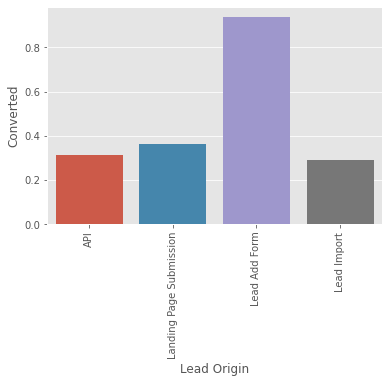

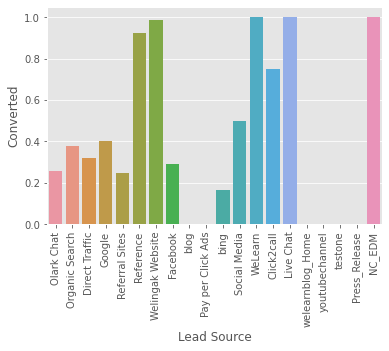

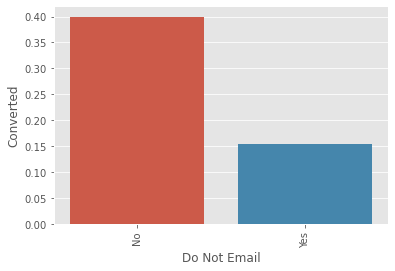

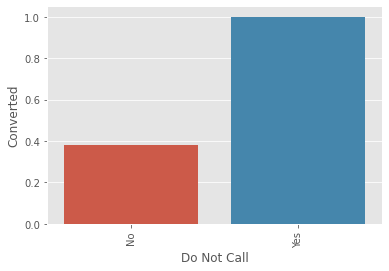

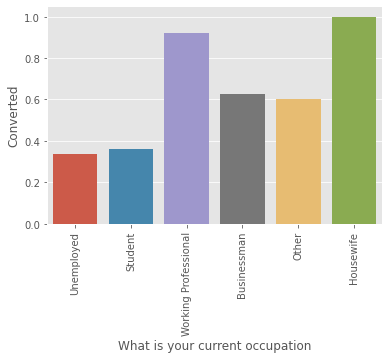

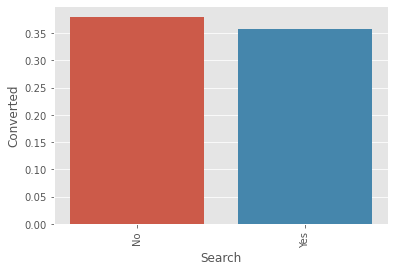

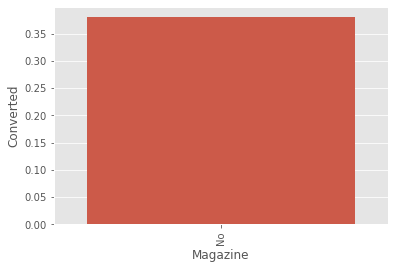

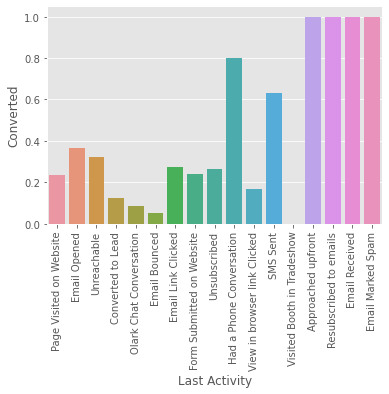

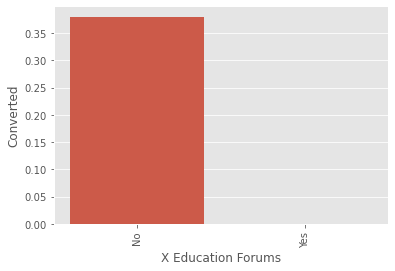

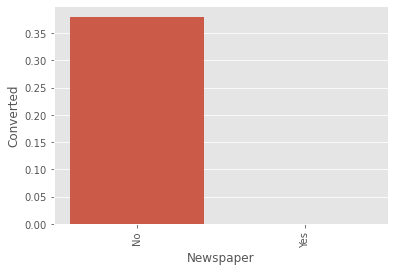

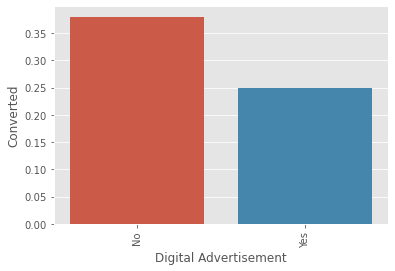

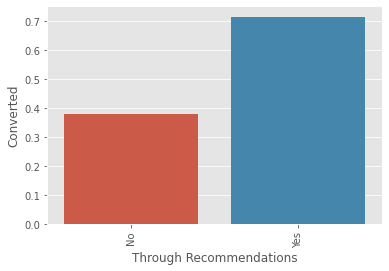

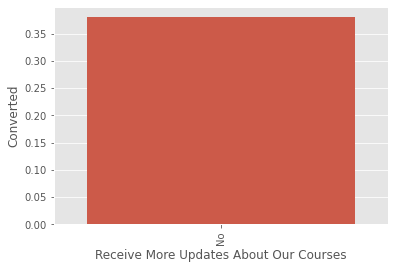

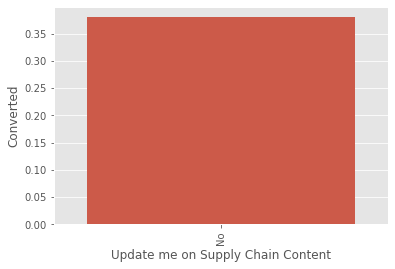

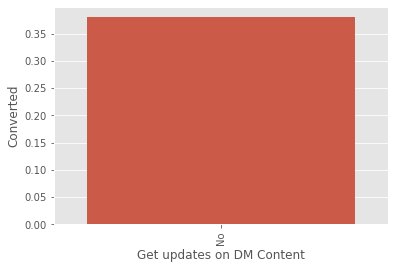

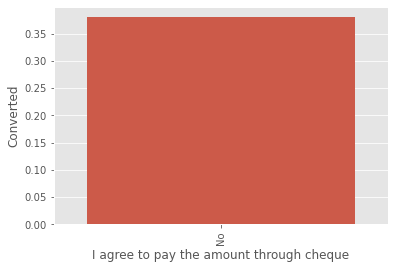

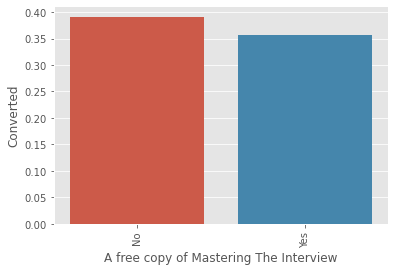

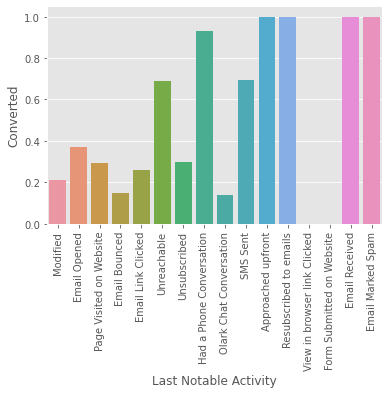

In [44]:
##for categorical and contnous usong barplot
for i in cats_cols:
  sns.barplot(lead[i], lead["Converted"], ci=None)
  plt.xticks(rotation=90)
  plt.show()

<AxesSubplot:>

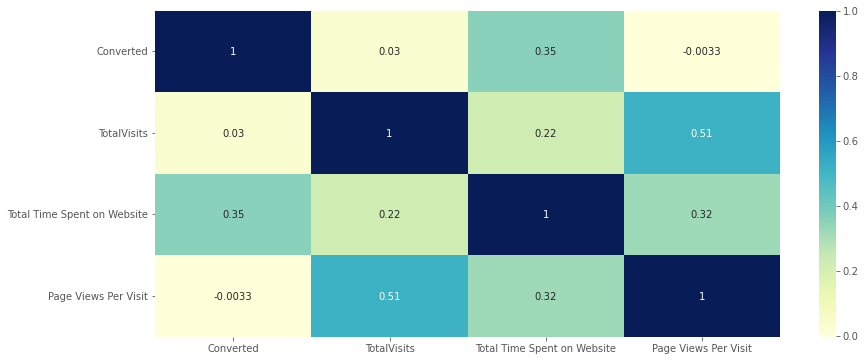

In [45]:
###mulivariate using heatmap
plt.figure(figsize=(14,6))
sns.heatmap(lead.corr(), annot=True, cmap='YlGnBu')


In [46]:
##after checking the graph i came to point these columns have one majority of label so they can be drop
lead.drop(["Magazine","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Get updates on DM Content","Do Not Call", "Update me on Supply Chain Content"],axis=1,inplace=True)

In [47]:
###droping the search due to has high no. of "No"
lead.drop("Search", axis=1, inplace=True)

In [48]:
###droping the "X Education Forums" due to has high no. of "No"
lead.drop("X Education Forums", axis=1, inplace=True)

In [49]:
###droping the "I agree to pay the amount through cheque" due to has high no. of "No"
lead.drop("I agree to pay the amount through cheque", axis=1, inplace=True)

In [50]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
 10  Last Notable Activity                   9103 non-null   obje

In [51]:
###Replacing the "yes" and "no" to "1" and "0" for Do not Email

lead["Do Not Email"]=lead["Do Not Email"].replace(["Yes", "No"],["1","0"])
##changing into int
lead["Do Not Email"]=pd.to_numeric(lead["Do Not Email"])

In [52]:
###Replacing the "yes" and "no" to "1" and "0" for I agree to pay the amount through cheque

lead["A free copy of Mastering The Interview"]=lead["A free copy of Mastering The Interview"].replace(["Yes", "No"],["1","0"])
##changing into int
lead["A free copy of Mastering The Interview"]=pd.to_numeric(lead["A free copy of Mastering The Interview"])

In [53]:
lead['A free copy of Mastering The Interview'].dtype

dtype('int64')

In [54]:
###Data Prepartion
###preparing data for modelling
##encoding:
       ##categorical varaibe into dummy variables

In [55]:
lead=pd.get_dummies(data=lead, columns=["Lead Origin","Lead Source","Last Activity", "What is your current occupation", "Last Notable Activity"], drop_first=True)

In [56]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [57]:
lead.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activ

<AxesSubplot:>

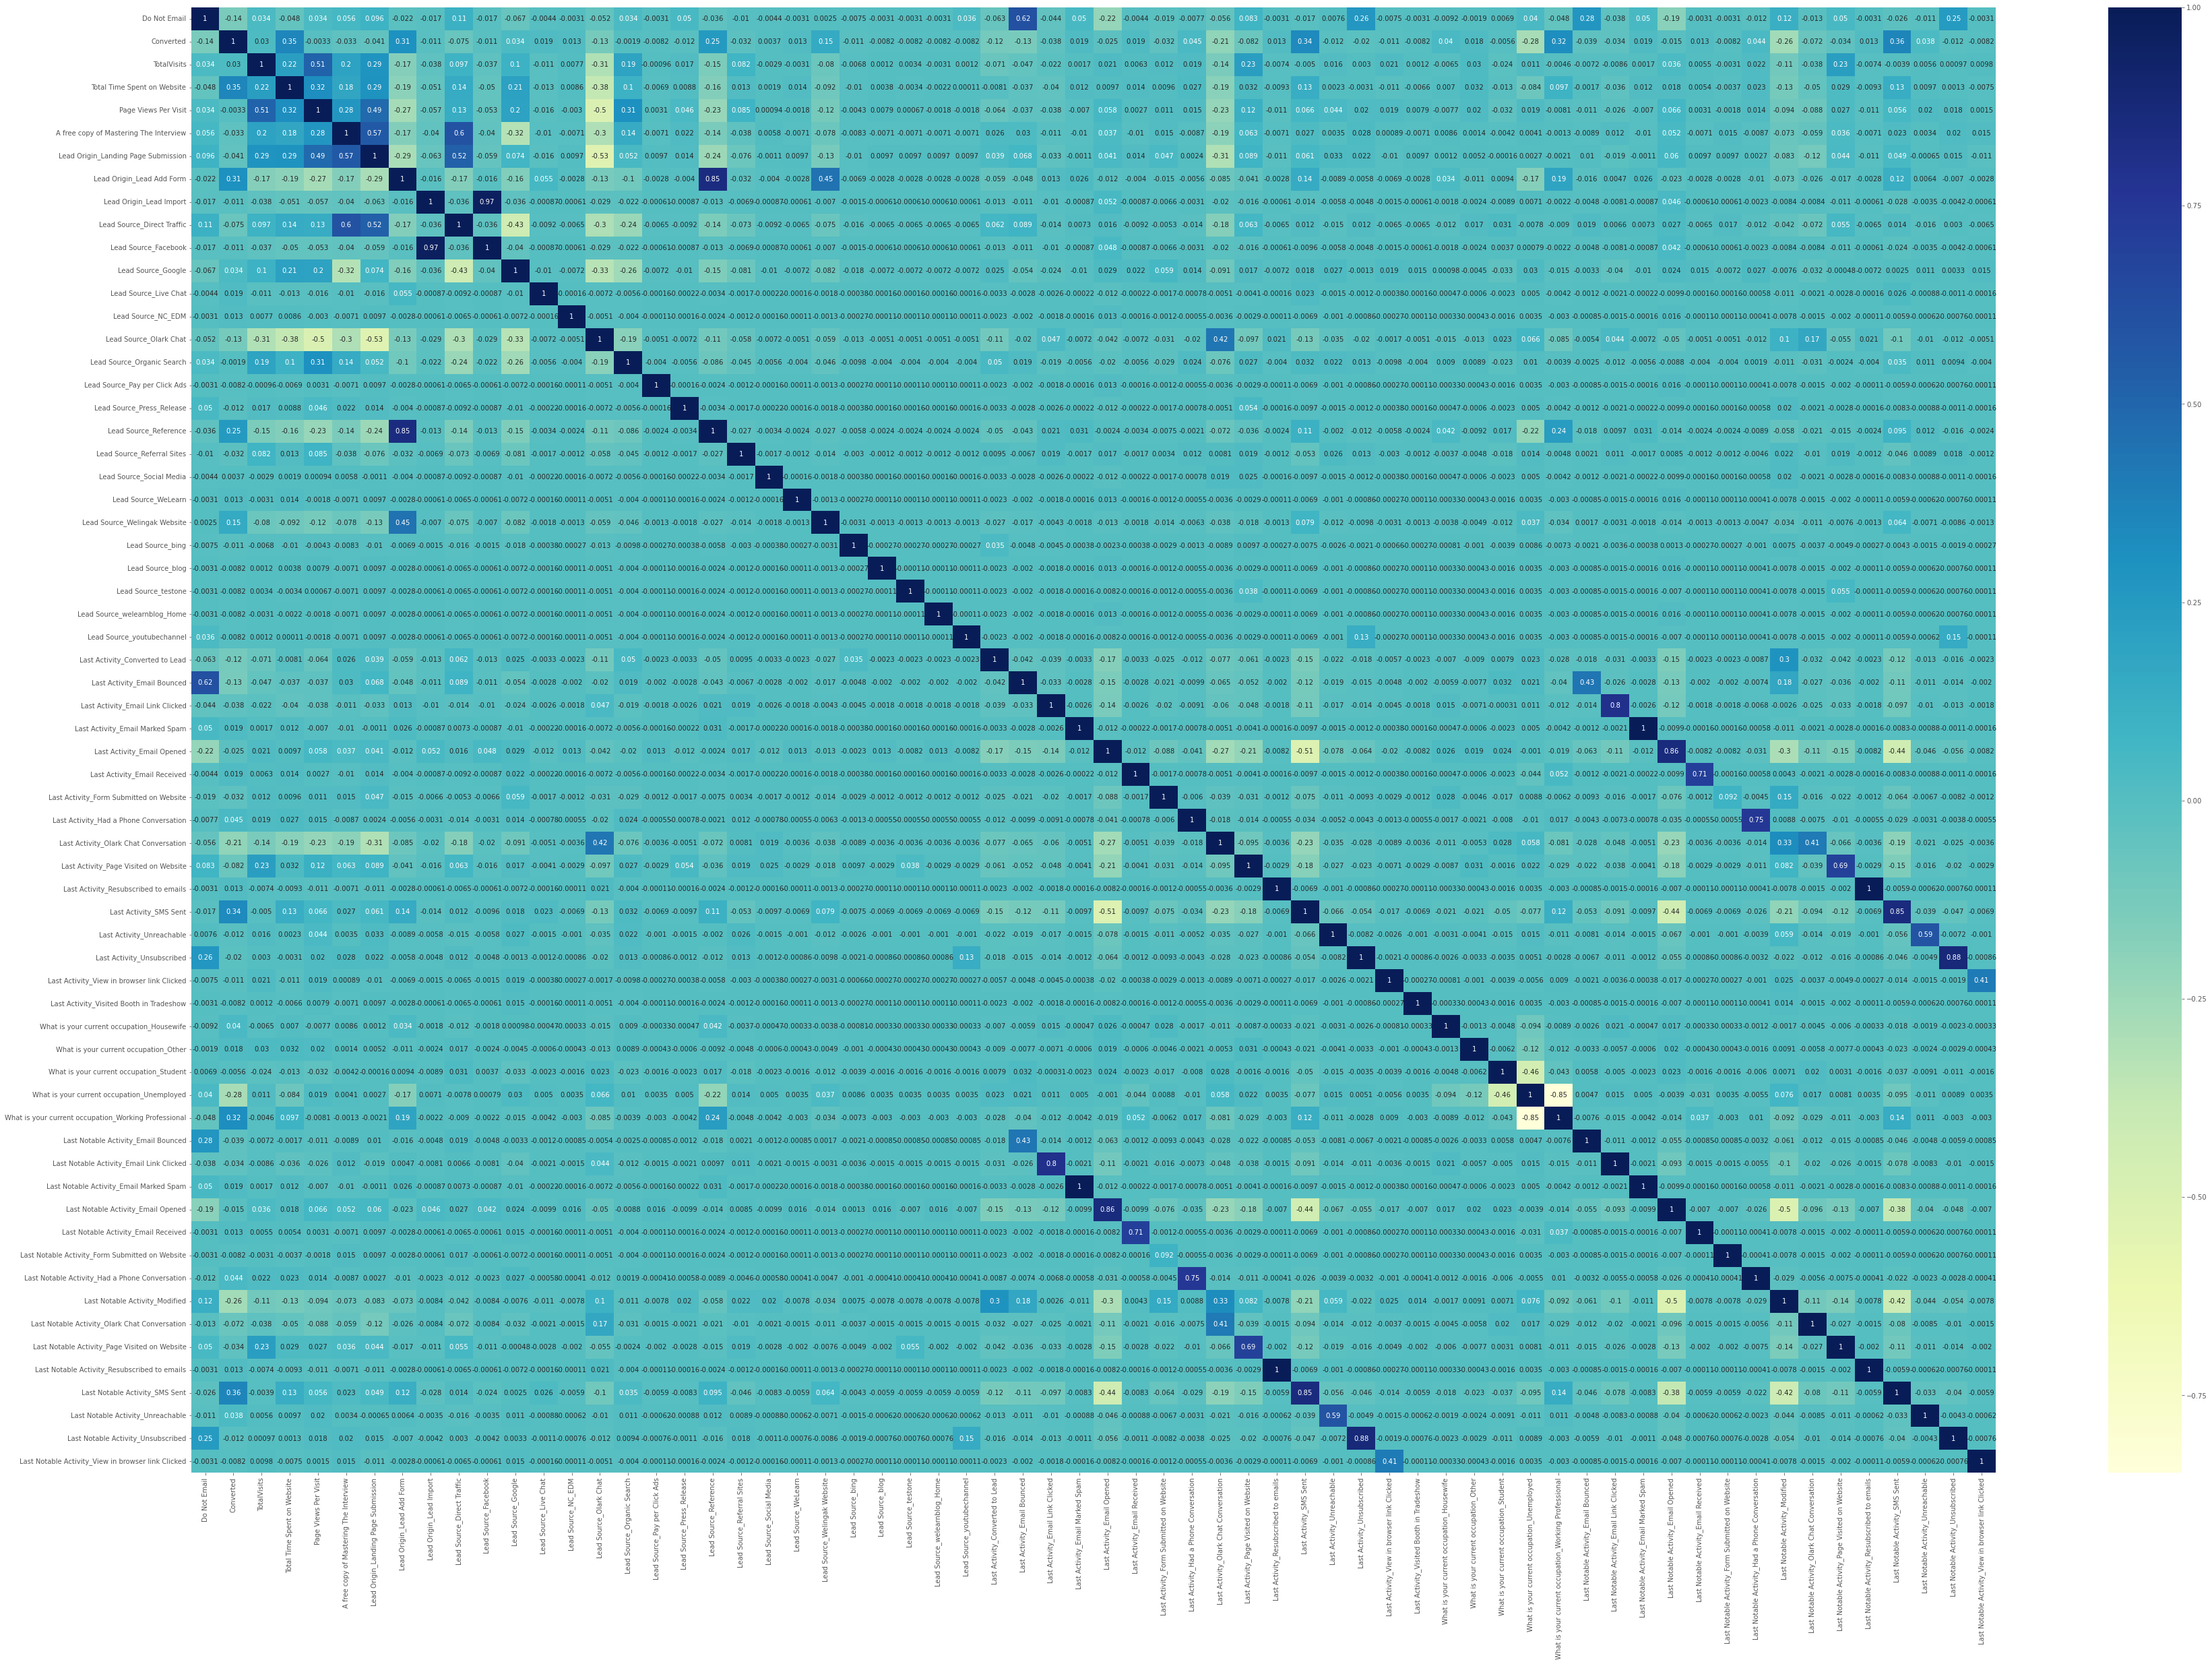

In [58]:
plt.figure(figsize=(60,40))
sns.heatmap(lead.corr(), annot=True, cmap='YlGnBu')

In [59]:
###train test split
X=lead.drop("Converted", axis=1)

In [60]:
y=lead["Converted"]

In [61]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [62]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
###train test split
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [64]:
###rescalinf the features
# Let us scale continuous variables
num_vars=["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [65]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,0.011952,0.570794,0.027273,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5520,0,0.027888,0.026631,0.127273,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1962,0,0.019920,0.075011,0.045455,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1566,0,0.055777,0.550821,0.063636,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9170,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [66]:
### Checking the Churn Rate
converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

38.02043282434362

# Model BUilding

In [67]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.8
Date:                Tue, 13 Sep 2022   Deviance:                       5219.5
Time:                        00:35:52   Pearson chi2:                 6.46e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.3714   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.4271      0.217     -6.571      0.000      -1.853      -1.001
TotalVisits                                             12.3680      2.709      4.565      0.000       7.058      17.678
Total Time Spent on Website                              4.5559      0.167     27.296      0.000       4.229       4.883
Page Views Per Visit                                    -3.5371      1.346     -2.628      0.009      -6.175      -0.899
A free copy of Mastering The Interview                   0.0512      0.105      0.489      0.625      -0.154       0.257
Lead Origin_Landing Page Submission                     -0.1951      0.106     -1.836      0.066      -0.403       0.013
Lead Origin_Lead Add Form                                4.2350      1.055      4.012      0.000       2.166       6.304
Lead Origin_Lead Import                                  1.7520      1.451      1.207      0.227      -1.093       4.597
Lead Source_Direct Traffic                               1.5008      1.637      0.917      0.359      -1.708       4.710
Lead Source_Facebook                                     1.0908      2.183      0.500      0.617      -3.187       5.369
Lead Source_Google                                       1.7929      1.633      1.098      0.272      -1.408       4.994
Lead Source_Live Chat                                   21.6765   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      25.4201   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                   2.6314      1.639      1.605      0.108      -0.581       5.844
Lead Source_Organic Search                               1.6020      1.638      0.978      0.328      -1.608       4.812
Lead Source_Pay per Click Ads                          -19.8047   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                            -1.094e-09   6.09e-06     -0.000      1.000   -1.19e-05    1.19e-05
Lead Source_Reference                                    1.2411      1.270      0.977      0.328      -1.247       3.730
Lead Source_Referral Sites                               1.2453      1.670      0.746      0.456      -2.027       4.518
Lead Source_Social Media                                 3.9810      2.186      1.821      0.069      -0.303       8.265
Lead Source_WeLearn                                     25.1709   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             3

# Step 8: Feature Selection Using RFE

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [69]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)
rfe = rfe.fit(X_train, y_train)

In [70]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False])

In [71]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 50),
 ('Lead Origin_Landing Page Submission', False, 40),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Direct Traffic', False, 29),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Pay per Click Ads', False, 44),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_blog', False, 30),
 ('Lead Source_testone', False, 43

In [72]:
col = X_train.columns[rfe.support_]

In [73]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activit

In [74]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', '

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2756.3
Date:                Tue, 13 Sep 2022   Deviance:                       5512.6
Time:                        00:36:02   Pearson chi2:                 6.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1048      0.057    -37.030      0.000      -2.216      -1.993
Do Not Email                                            -1.5149      0.161     -9.399      0.000      -1.831      -1.199
Total Time Spent on Website                              4.0051      0.142     28.220      0.000       3.727       4.283
Lead Origin_Lead Add Form                                3.7347      0.219     17.039      0.000       3.305       4.164
Lead Source_Welingak Website                             1.8969      0.754      2.517      0.012       0.420       3.374
Last Activity_Converted to Lead                         -1.3187      0.205     -6.441      0.000      -1.720      -0.917
What is your current occupation_Housewife               23.1383   1.63e+04      0.001      0.999   -3.19e+04     3.2e+04
What is your current occupation_Working Professional     2.7812      0.184     15.075      0.000       2.420       3.143
Last Notable Activity_Had a Phone Conversation           2.8694      1.109      2.588      0.010       0.696       5.042
Last Notable Activity_SMS Sent                           1.5946      0.077     20.671      0.000       1.443       1.746
Last Notable Activity_Unreachable                        1.7673      0.506      3.493      0.000       0.776       2.759
========================================================================================================================
"""

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.43
1,Total Time Spent on Website,1.32
3,Lead Source_Welingak Website,1.32
8,Last Notable Activity_SMS Sent,1.31
6,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.03
4,Last Activity_Converted to Lead,1.03
5,What is your current occupation_Housewife,1.00
7,Last Notable Activity_Had a Phone Conversation,1.00
9,Last Notable Activity_Unreachable,1.00


In [77]:
###dropping What is your current occupation_Housewife due to high p value 

In [78]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [79]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2762.9
Date:                Tue, 13 Sep 2022   Deviance:                       5525.9
Time:                        00:36:03   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0994      0.057    -37.008      0.000      -2.211      -1.988
Do Not Email                                            -1.5190      0.161     -9.427      0.000      -1.835      -1.203
Total Time Spent on Website                              4.0091      0.142     28.273      0.000       3.731       4.287
Lead Origin_Lead Add Form                                3.7383      0.219     17.065      0.000       3.309       4.168
Lead Source_Welingak Website                             1.8904      0.754      2.509      0.012       0.413       3.367
Last Activity_Converted to Lead                         -1.3251      0.205     -6.473      0.000      -1.726      -0.924
What is your current occupation_Working Professional     2.7770      0.185     15.051      0.000       2.415       3.139
Last Notable Activity_Had a Phone Conversation           2.8631      1.109      2.582      0.010       0.690       5.036
Last Notable Activity_SMS Sent                           1.5887      0.077     20.604      0.000       1.438       1.740
Last Notable Activity_Unreachable                        1.7612      0.506      3.481      0.000       0.770       2.753
========================================================================================================================
"""

In [80]:
##checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.43
3,Lead Source_Welingak Website,1.32
1,Total Time Spent on Website,1.31
7,Last Notable Activity_SMS Sent,1.31
5,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.03
4,Last Activity_Converted to Lead,1.03
6,Last Notable Activity_Had a Phone Conversation,1.00
8,Last Notable Activity_Unreachable,1.00


In [81]:
###model having low p value and low vif


# Model Evaluation

In [82]:
##Using predict to prdict the probabilities on the train set
y_train_pred=res.predict(sm.add_constant(X_train_sm))
y_train_pred[:10]

7962    0.855412
5520    0.119975
1962    0.142009
1566    0.947142
9170    0.109152
5097    0.109152
8954    0.544372
309     0.163634
5519    0.375030
1050    0.459688
dtype: float64

In [83]:
##reshaping into an array
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85541184, 0.11997494, 0.14200867, 0.94714235, 0.10915171,
       0.10915171, 0.54437169, 0.16363371, 0.37502994, 0.45968808])

In [84]:
y_train_pred_final=pd.DataFrame({"Converted":y_train.values, "Coversion_prob":y_train_pred})
y_train_pred_final.head()

,Converted,Coversion_prob
0,0,0.855412
1,0,0.119975
2,0,0.142009
3,1,0.947142
4,0,0.109152


In [85]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Coversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Coversion_prob,predicted
0,0,0.855412,1
1,0,0.119975,0
2,0,0.142009,0
3,1,0.947142,1
4,0,0.109152,0


In [86]:
###import metrics from sklearn for evaluation
from sklearn import metrics

In [87]:
###confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3492,  461],
       [ 837, 1582]], dtype=int64)

In [88]:
# Actual/Predicted     not_churn    churn
        # not_churn        3492      461
        # churn            837       1582  

In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7962962962962963

# Metrics beyond simply accuracy

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6539892517569244

In [92]:
# Let us calculate specificity
TN / float(TN+FP)

0.8833797116114344

In [93]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.11662028838856564


In [94]:
# positive predictive value 
print (TP / float(TP+FP))

0.7743514439549681


In [95]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8066528066528067


# Finding the optimal cuttoff

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Coversion_prob, drop_intermediate = False )

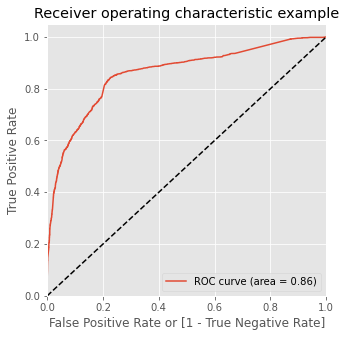

In [98]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Coversion_prob)

In [99]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Coversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Coversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.855412,1,1,1,1,1,1,1,1,1,1,0
1,0,0.119975,0,1,1,0,0,0,0,0,0,0,0
2,0,0.142009,0,1,1,0,0,0,0,0,0,0,0
3,1,0.947142,1,1,1,1,1,1,1,1,1,1,1
4,0,0.109152,0,1,1,0,0,0,0,0,0,0,0


In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.456372  0.991732  0.128763
0.2   0.2  0.762084  0.869781  0.696180
0.3   0.3  0.799906  0.840017  0.775360
0.4   0.4  0.793158  0.746176  0.821907
0.5   0.5  0.796296  0.653989  0.883380
0.6   0.6  0.794256  0.572964  0.929674
0.7   0.7  0.781387  0.491939  0.958513
0.8   0.8  0.760044  0.410500  0.973944
0.9   0.9  0.711551  0.255064  0.990893


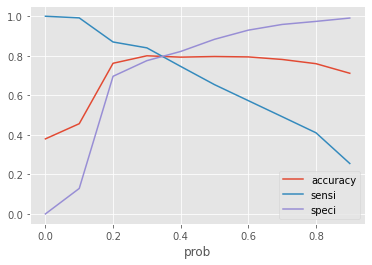

In [101]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Coversion_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Coversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.855412,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.119975,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.142009,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.947142,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.109152,0,1,1,0,0,0,0,0,0,0,0,0


In [103]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7999058380414312

In [104]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3065,  888],
       [ 387, 2032]], dtype=int64)

In [105]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8400165357585779

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.775360485707058

In [108]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.22463951429294207


In [109]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6958904109589041


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8878910776361529


# Precision and Recall

In [111]:
#Looking at the confusion matrix again

In [112]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3492,  461],
       [ 837, 1582]], dtype=int64)

In [113]:
##Precision
##TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7743514439549681

In [114]:
##Recall
##TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6539892517569244

In [115]:
from sklearn.metrics import precision_score, recall_score

In [116]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7743514439549681

In [117]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6539892517569244

# Precision and recall tradeoff

In [118]:
from sklearn.metrics import precision_recall_curve

In [119]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Coversion_prob)

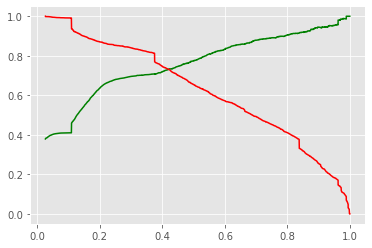

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Maing prediction on test

In [122]:
X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]=scaler.transform(X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

In [123]:
###select the column in X_train for X_test as well.
X_test=X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Converted to Lead,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3504,0,0.188194,0,0,0,0,0,0,0
4050,0,0.000000,1,0,0,0,0,1,0
7201,1,0.316023,0,0,0,0,0,1,0
1196,0,0.187750,0,0,0,0,0,0,0
8219,0,0.109632,0,0,0,0,0,0,0


Add a constant to X_test

In [124]:
X_test_sm=sm.add_constant(X_test[col])

In [125]:
###check X_test_sm
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Converted to Lead,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3504,1.0,0,0.188194,0,0,0,0,0,0,0
4050,1.0,0,0.000000,1,0,0,0,0,1,0
7201,1.0,1,0.316023,0,0,0,0,0,1,0
1196,1.0,0,0.187750,0,0,0,0,0,0,0
8219,1.0,0,0.109632,0,0,0,0,0,0,0


In [126]:
####making prediction on the test set and store it int the variable  "y_test_pred"
y_test_pred=res.predict(sm.add_constant(X_test))

In [127]:
y_test_pred.head()

3504    0.206698
4050    0.961858
7201    0.318047
1196    0.206407
8219    0.159774
dtype: float64

In [128]:
###converting y_test_pred into dataframe
y_pred_1=pd.DataFrame(y_test_pred)

In [129]:
y_pred_1.head()

,0
3504,0.206698
4050,0.961858
7201,0.318047
1196,0.206407
8219,0.159774


In [130]:
###converting y_test into dataframe
y_test_df=pd.DataFrame(y_test)

In [131]:
y_test_df.head()

,Converted
3504,0
4050,1
7201,0
1196,0
8219,1


In [132]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [133]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [134]:
y_pred_final.head()

,Converted,0
0,0,0.206698
1,1,0.961858
2,0,0.318047
3,0,0.206407
4,1,0.159774


In [135]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [136]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Churn_Prob
0,0,0.206698
1,1,0.961858
2,0,0.318047
3,0,0.206407
4,1,0.159774


In [137]:
##making prediction on the test set using 0.42 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [138]:
y_pred_final.head()

,Converted,Churn_Prob,final_predicted
0,0,0.206698,0
1,1,0.961858,1
2,0,0.318047,0
3,0,0.206407,0
4,1,0.159774,0


In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7846942511900403

In [140]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1404,  285],
       [ 303,  739]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7092130518234165

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.8312611012433393

In [144]:
###loking at the confusion metrics again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3065,  888],
       [ 387, 2032]], dtype=int64)

##precision

In [145]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6958904109589041

# Recall

In [146]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8400165357585779